#  Assisting children while biking

### Gruppe 7: Maximilian Hörnis, Florian Schwarm, Dennis Rupprecht

## Motivation 
- Children are active participants in road traffic
- Traffic signs might not be obvious to them
- Handheld technology device (smartphones etc.) usage is prevalent among children 

## Idea

Recognize and classify traffic signs automatically and display them in
an easy to understand assistive technology for children, without distracting them.

## Tasks
    
- Recognizing and classifiying traffic signs
- Interpretation of images in a way that is
    - a) sufficiently comprehensible for children and
    - b) not distracting.

## Possible Extensions

- Detection of intersections without relying on traffic signs
- Detection of traffic lights and their current position (red, green, yellow)
- Applying the traffic sign classifier to live video (or recordings)
- Integrating the system into a mobile application

## Possible Issues

- Recognizing dirty or occluded signs

- Determining which street a sign refers to and how long it is valid
- Reliable detection of intersections

# Imports

In [1]:
!pip install Augmentor

In [0]:
import zipfile
import cv2 as cv
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os.path
import Augmentor
import os


# Machine Learning

## The dataset

The dataset we are using is a modified version of the German Traffic Sign Recognition Benchmark (GTSRB) dataset [1]. 

[1] http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset

In [3]:
!wget -c https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip -O training_data.zip

--2020-01-21 08:03:09--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘training_data.zip’

training_data.zip   100%[===================>] 263.50M  25.5MB/s    in 11s     

2020-01-21 08:03:21 (23.4 MB/s) - ‘training_data.zip’ saved [276294756/276294756]



In [4]:
!rm -r GTSRB
!rm -r training_data

with zipfile.ZipFile("training_data.zip", "r") as zip_ref:
  zip_ref.extractall()

rm: cannot remove 'GTSRB': No such file or directory
rm: cannot remove 'training_data': No such file or directory


We remove all the images that are not relevant to bike traffic (e.g. highway speed limits) and add reference images for each sign type to the dataset.

In [0]:
!mv GTSRB/Final_Training/Images training_data/
!rm -r training_data/00000
!rm -r training_data/00001
!rm -r training_data/00002
!rm -r training_data/00003
!rm -r training_data/00004
!rm -r training_data/00005
!rm -r training_data/00006
!rm -r training_data/00007
!rm -r training_data/00008
!rm -r training_data/00009
!rm -r training_data/00010
!mv training_data/00011 training_data/priority
!mv training_data/00012 training_data/priority_road
!mv training_data/00013 training_data/yield
!mv training_data/00014 training_data/stop
!mv training_data/00015 training_data/no_entrance
!rm -r training_data/00016
!mv training_data/00017 training_data/no_entry_vehicles
!mv training_data/00018 training_data/danger_ahead
!rm -r training_data/00019
!rm -r training_data/00020
!mv training_data/00021 training_data/double_bend
!rm -r training_data/00022
!rm -r training_data/00023
!rm -r training_data/00024
!mv training_data/00025 training_data/road_works
!mv training_data/00026 training_data/traffic_signals
!mv training_data/00027 training_data/pedestrians_in_road_ahead
!mv training_data/00028 training_data/children_crossing_ahead
!rm -r training_data/00029
!rm -r training_data/00030
!rm -r training_data/00031
!rm -r training_data/00032
!mv training_data/00033 training_data/turn_right_ahead
!mv training_data/00034 training_data/turn_left_ahead
!mv training_data/00035 training_data/proceed_ahead
!mv training_data/00036 training_data/ahead_or_right_only
!mv training_data/00037 training_data/ahead_or_left_only
!mv training_data/00038 training_data/keep_right
!mv training_data/00039 training_data/keep_left
!rm -r training_data/00040
!rm -r training_data/00041
!rm -r training_data/00042
!rm $(find . -iname '*.csv')

In [0]:
!wget -q https://www.dvr.de/bilder/stvo/gt/301.png -O training_data/priority/reference.png
!wget -q https://www.dvr.de/bilder/stvo/gt/306.png -O training_data/priority_road/reference.png
!wget -q https://www.dvr.de/bilder/stvo/gt/205.png -O training_data/yield/reference.png
!wget -q https://www.dvr.de/bilder/stvo/gt/206.png -O training_data/stop/reference.png
!wget -q https://www.dvr.de/bilder/stvo/gt/250.png -O training_data/no_entrance/reference.png
!wget -q https://www.dvr.de/bilder/stvo/gt/267.png -O training_data/no_entry_vehicles/reference.png
!wget -q https://www.dvr.de/bilder/stvo/gt/101.png -O training_data/danger_ahead/reference.png
!wget -q https://www.dvr.de/bilder/stvo/gt/105-10.png -O training_data/double_bend/reference.png
!wget -q https://www.dvr.de/bilder/stvo/gt/123.png -O training_data/road_works/reference.png
!wget -q https://www.dvr.de/bilder/stvo/gt/131.png -O training_data/traffic_signals/reference.png
!wget -q https://www.dvr.de/bilder/stvo/gt/133-10.png -O training_data/pedestrians_in_road_ahead/reference.png
!wget -q https://www.dvr.de/bilder/stvo/gt/136-10.png -O training_data/children_crossing_ahead/reference.png
!wget -q https://www.dvr.de/bilder/stvo/gt/209.png -O training_data/turn_right_ahead/reference.png
!wget -q https://www.dvr.de/bilder/stvo/gt/214.png -O training_data/ahead_or_right_only/reference.png
!wget -q https://www.dvr.de/bilder/stvo/gt/222.png -O training_data/keep_right/reference.png

In [7]:
cv.imwrite("training_data/turn_left_ahead/reference.png", cv.flip(cv.imread("training_data/turn_right_ahead/reference.png"), 1))
cv.imwrite("training_data/keep_left/reference.png", cv.flip(cv.imread("training_data/keep_right/reference.png"), 1))
cv.imwrite("training_data/ahead_or_left_only/reference.png", cv.flip(cv.imread("training_data/ahead_or_right_only/reference.png"), 1))

True

We can take a look at the extracted training data.

In [8]:
!apt install -qq tree > /dev/null
!tree --filelimit 20 training_data/



training_data/
├── ahead_or_left_only [211 entries exceeds filelimit, not opening dir]
├── ahead_or_right_only [391 entries exceeds filelimit, not opening dir]
├── children_crossing_ahead [541 entries exceeds filelimit, not opening dir]
├── danger_ahead [1201 entries exceeds filelimit, not opening dir]
├── double_bend [331 entries exceeds filelimit, not opening dir]
├── keep_left [301 entries exceeds filelimit, not opening dir]
├── keep_right [2071 entries exceeds filelimit, not opening dir]
├── no_entrance [631 entries exceeds filelimit, not opening dir]
├── no_entry_vehicles [1111 entries exceeds filelimit, not opening dir]
├── pedestrians_in_road_ahead [241 entries exceeds filelimit, not opening dir]
├── priority [1321 entries exceeds filelimit, not opening dir]
├── priority_road [2101 entries exceeds filelimit, not opening dir]
├── proceed_ahead [1200 entries exceeds filelimit, not opening dir]
├── road_works [1501 entries exceeds filelimit, not opening dir]
├── stop [781 entries

It consists of 19 categories of traffic signs that have been extracted from the GTSRB dataset. Each image shows exactly one traffic sign, usually roughly at the center of the image. Some of the traffic signs might be partially ocluded, rotated, or facing away from the camera.

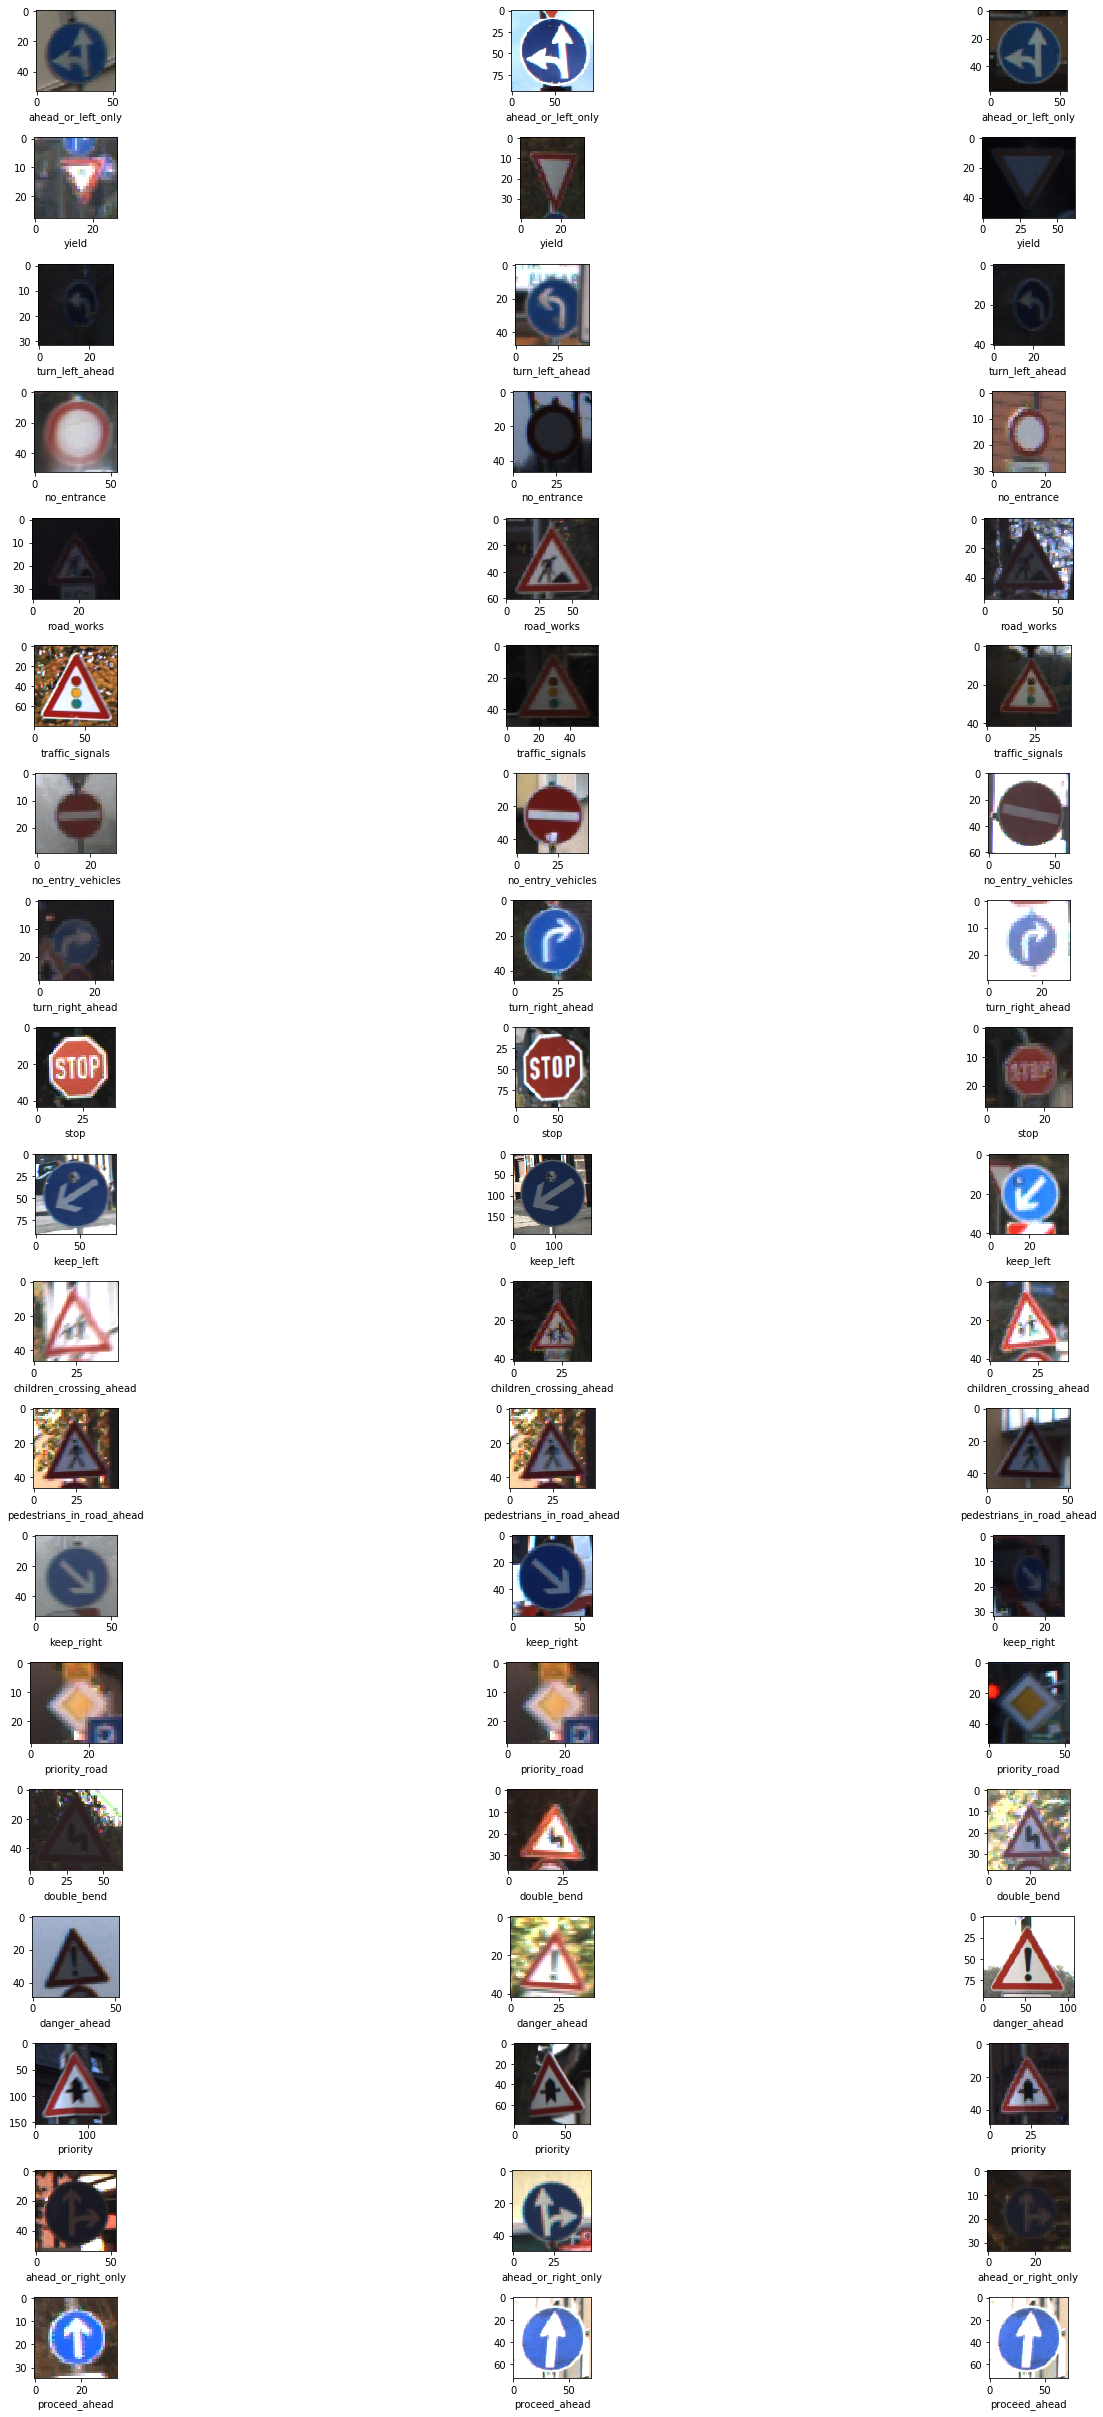

In [9]:
%matplotlib inline

fig = plt.figure(figsize=(20,35))
for sign_num, sign_type in enumerate(os.listdir("training_data/")):
    sign_path = os.path.join("training_data", sign_type)
    images = np.array(os.listdir(sign_path))
    
    selector = np.random.randint(0, len(sign_path), size=3)
    
    for j, img in enumerate(images[selector]):
        plt.subplot(20, 3, (sign_num * 3) + j + 1)
        plt.xlabel(sign_type)
        plt.imshow(cv.cvtColor(cv.imread(os.path.join(sign_path, img)), cv.COLOR_BGR2RGB))
        
fig.tight_layout()

### TODO: Data Augmentation

Preprocessing the data by augmenting.

In [0]:
for sign_num, sign_type in enumerate(os.listdir("training_data/")):
    sign_path = os.path.join("training_data", sign_type)
    images = os.listdir(sign_path)
    
    for image in images:
      try:
        img = cv.imread(os.path.join(sign_path, image))

        if img.shape[0] < 50 or img.shape[1] < 50:
            os.remove(os.path.join(sign_path, image))
        
        elif image.endswith("ppm"):
            cv.imwrite(os.path.join(sign_path, image.replace("ppm", "png")), img)
            os.remove(os.path.join(sign_path, image))
      except:
        pass

In [11]:
TARGET_NUMBER_OF_IMGS = 2000

for sign_num, sign_type in enumerate(os.listdir("training_data/")):
    sign_path = os.path.join("training_data", sign_type)
    num_images = len(os.listdir(sign_path))

    p = Augmentor.Pipeline(sign_path)
    print("\n")

    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
    p.skew(probability=0.3)
    #p.gaussian_distortion(probability=0.4, grid_width=10, grid_height=10, magnitude=4, corner="bell", method="in")

    if num_images <= TARGET_NUMBER_OF_IMGS:
      p.sample(TARGET_NUMBER_OF_IMGS - num_images)
    
    print("\n")

Executing Pipeline:   0%|          | 0/1917 [00:00<?, ? Samples/s]

Initialised with 83 image(s) found.
Output directory set to training_data/ahead_or_left_only/output.



Processing <PIL.Image.Image image mode=RGB size=81x79 at 0x7EFF3AC903C8>: 100%|██████████| 1917/1917 [00:15<00:00, 124.89 Samples/s]




Initialised with 1010 image(s) found.
Output directory set to training_data/yield/output.



Processing <PIL.Image.Image image mode=RGB size=71x65 at 0x7EFF3A9ED518>: 100%|██████████| 990/990 [00:05<00:00, 180.28 Samples/s]
Executing Pipeline:   0%|          | 0/1863 [00:00<?, ? Samples/s]



Initialised with 137 image(s) found.
Output directory set to training_data/turn_left_ahead/output.



Processing <PIL.Image.Image image mode=RGB size=83x83 at 0x7EFF3ABA2550>: 100%|██████████| 1863/1863 [00:10<00:00, 185.30 Samples/s]
Executing Pipeline:   0%|          | 0/1813 [00:00<?, ? Samples/s]



Initialised with 187 image(s) found.
Output directory set to training_data/no_entrance/output.



Processing <PIL.Image.Image image mode=RGB size=52x51 at 0x7EFF3AA3C6A0>: 100%|██████████| 1813/1813 [00:10<00:00, 172.70 Samples/s]
Executing Pipeline:   0%|          | 0/1216 [00:00<?, ? Samples/s]



Initialised with 784 image(s) found.
Output directory set to training_data/road_works/output.



Processing <PIL.Image.Image image mode=RGB size=187x176 at 0x7EFF3AAAD3C8>: 100%|██████████| 1216/1216 [00:06<00:00, 196.77 Samples/s]
Executing Pipeline:   0%|          | 0/1785 [00:00<?, ? Samples/s]



Initialised with 215 image(s) found.
Output directory set to training_data/traffic_signals/output.



Processing <PIL.Image.Image image mode=RGB size=68x60 at 0x7EFF3AC26748>: 100%|██████████| 1785/1785 [00:10<00:00, 172.59 Samples/s]
Executing Pipeline:   0%|          | 0/1847 [00:00<?, ? Samples/s]



Initialised with 153 image(s) found.
Output directory set to training_data/no_entry_vehicles/output.



Processing <PIL.Image.Image image mode=RGB size=56x51 at 0x7EFF3AC1D2B0>: 100%|██████████| 1847/1847 [00:08<00:00, 208.21 Samples/s]
Executing Pipeline:   0%|          | 0/1749 [00:00<?, ? Samples/s]



Initialised with 251 image(s) found.
Output directory set to training_data/turn_right_ahead/output.



Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=51x50 at 0x7EFF3AC4F710>: 100%|██████████| 1749/1749 [00:09<00:00, 178.00 Samples/s]
Executing Pipeline:   0%|          | 0/1547 [00:00<?, ? Samples/s]



Initialised with 453 image(s) found.
Output directory set to training_data/stop/output.



Processing <PIL.Image.Image image mode=RGB size=81x83 at 0x7EFF3AB54668>: 100%|██████████| 1547/1547 [00:08<00:00, 174.64 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=71x71 at 0x7EFF3A9BA588>:   0%|          | 1/1865 [00:00<05:18,  5.85 Samples/s]



Initialised with 135 image(s) found.
Output directory set to training_data/keep_left/output.



Processing <PIL.Image.Image image mode=RGB size=51x51 at 0x7EFF3A98A6D8>: 100%|██████████| 1865/1865 [00:11<00:00, 160.68 Samples/s]
Executing Pipeline:   0%|          | 0/1737 [00:00<?, ? Samples/s]



Initialised with 263 image(s) found.
Output directory set to training_data/children_crossing_ahead/output.



Processing <PIL.Image.Image image mode=RGB size=85x75 at 0x7EFF3ABF7160>: 100%|██████████| 1737/1737 [00:10<00:00, 545.17 Samples/s]
Executing Pipeline:   0%|          | 0/1896 [00:00<?, ? Samples/s]



Initialised with 104 image(s) found.
Output directory set to training_data/pedestrians_in_road_ahead/output.



Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x63 at 0x7EFF3AA6E748>: 100%|██████████| 1896/1896 [00:14<00:00, 132.46 Samples/s]
Executing Pipeline:   0%|          | 0/1394 [00:00<?, ? Samples/s]



Initialised with 606 image(s) found.
Output directory set to training_data/keep_right/output.



Processing <PIL.Image.Image image mode=RGB size=80x84 at 0x7EFF46E86198>: 100%|██████████| 1394/1394 [00:07<00:00, 197.75 Samples/s]
Executing Pipeline:   0%|          | 0/1123 [00:00<?, ? Samples/s]



Initialised with 877 image(s) found.
Output directory set to training_data/priority_road/output.



Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=72x72 at 0x7EFF4BA464A8>: 100%|██████████| 1123/1123 [00:05<00:00, 193.32 Samples/s]
Executing Pipeline:   0%|          | 0/1877 [00:00<?, ? Samples/s]



Initialised with 123 image(s) found.
Output directory set to training_data/double_bend/output.



Processing <PIL.Image.Image image mode=RGB size=141x124 at 0x7EFF3AB80240>: 100%|██████████| 1877/1877 [00:12<00:00, 155.31 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=53x53 at 0x7EFF46D7DBA8>:   0%|          | 1/1362 [00:00<02:54,  7.78 Samples/s]



Initialised with 638 image(s) found.
Output directory set to training_data/danger_ahead/output.



Processing <PIL.Image.Image image mode=RGB size=72x63 at 0x7EFF3AB73668>: 100%|██████████| 1362/1362 [00:06<00:00, 195.18 Samples/s]
Executing Pipeline:   0%|          | 0/1304 [00:00<?, ? Samples/s]



Initialised with 696 image(s) found.
Output directory set to training_data/priority/output.



Processing <PIL.Image.Image image mode=RGB size=83x74 at 0x7EFF3AADBBA8>: 100%|██████████| 1304/1304 [00:06<00:00, 191.26 Samples/s]
Executing Pipeline:   0%|          | 0/1869 [00:00<?, ? Samples/s]



Initialised with 131 image(s) found.
Output directory set to training_data/ahead_or_right_only/output.



Processing <PIL.Image.Image image mode=RGB size=73x74 at 0x7EFF3AB1CDD8>: 100%|██████████| 1869/1869 [00:11<00:00, 156.31 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=51x52 at 0x7EFF3ABBCD68>:   0%|          | 1/1664 [00:00<03:23,  8.17 Samples/s]



Initialised with 336 image(s) found.
Output directory set to training_data/proceed_ahead/output.



Processing <PIL.Image.Image image mode=RGB size=152x146 at 0x7EFF3AB58860>: 100%|██████████| 1664/1664 [00:08<00:00, 205.35 Samples/s]


We can now move the generated images into the correct directories.

In [0]:
for sign_num, sign_type in enumerate(os.listdir("training_data/")):
    sign_path = os.path.join("training_data", sign_type)
    output_path = os.path.join(sign_path, "output")

    for filename in os.listdir(output_path):
      os.rename(os.path.join(output_path, filename), os.path.join(sign_path, filename))

    os.rmdir(os.path.join(sign_path, "output"))

The data is processed by loading all images, resizing them to a dimension of 80 by 80 pixels and then storing the images in a NumPy array.

In [13]:
def process_image(fileName):
    img = cv.imread(fileName)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, (80,80))
    return img

DATA_PATH = "training_data/"

X = []
y = []

num_samples = 0

signs = os.listdir(DATA_PATH)

for sign in signs:
    current_samples = num_samples
    
    sign_path = os.path.join(DATA_PATH, sign)
    
    for file in os.listdir(sign_path):
        if not (file.endswith(".ppm") or file.endswith(".png")):
            continue
        
        img = process_image(os.path.join(sign_path, file))
        
        X.append(img)
        y.append(signs.index(sign))
        num_samples += 1

    print(f"Read {num_samples - current_samples} samples for {sign}.")

X = np.array(X)
y = np.array(y)

print(f"Number of Samples: {num_samples}")

Read 2000 samples for ahead_or_left_only.
Read 2000 samples for yield.
Read 2000 samples for turn_left_ahead.
Read 2000 samples for no_entrance.
Read 2000 samples for road_works.
Read 2000 samples for traffic_signals.
Read 2000 samples for no_entry_vehicles.
Read 2000 samples for turn_right_ahead.
Read 2000 samples for stop.
Read 2000 samples for keep_left.
Read 2000 samples for children_crossing_ahead.
Read 2000 samples for pedestrians_in_road_ahead.
Read 2000 samples for keep_right.
Read 2000 samples for priority_road.
Read 2000 samples for double_bend.
Read 2000 samples for danger_ahead.
Read 2000 samples for priority.
Read 2000 samples for ahead_or_right_only.
Read 2000 samples for proceed_ahead.
Number of Samples: 38000


We split the dataset into a training and test set using a 75/25 split (the default setting in train_test_split).

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

This yields the following distribution for the training and test sets:

<BarContainer object of 19 artists>

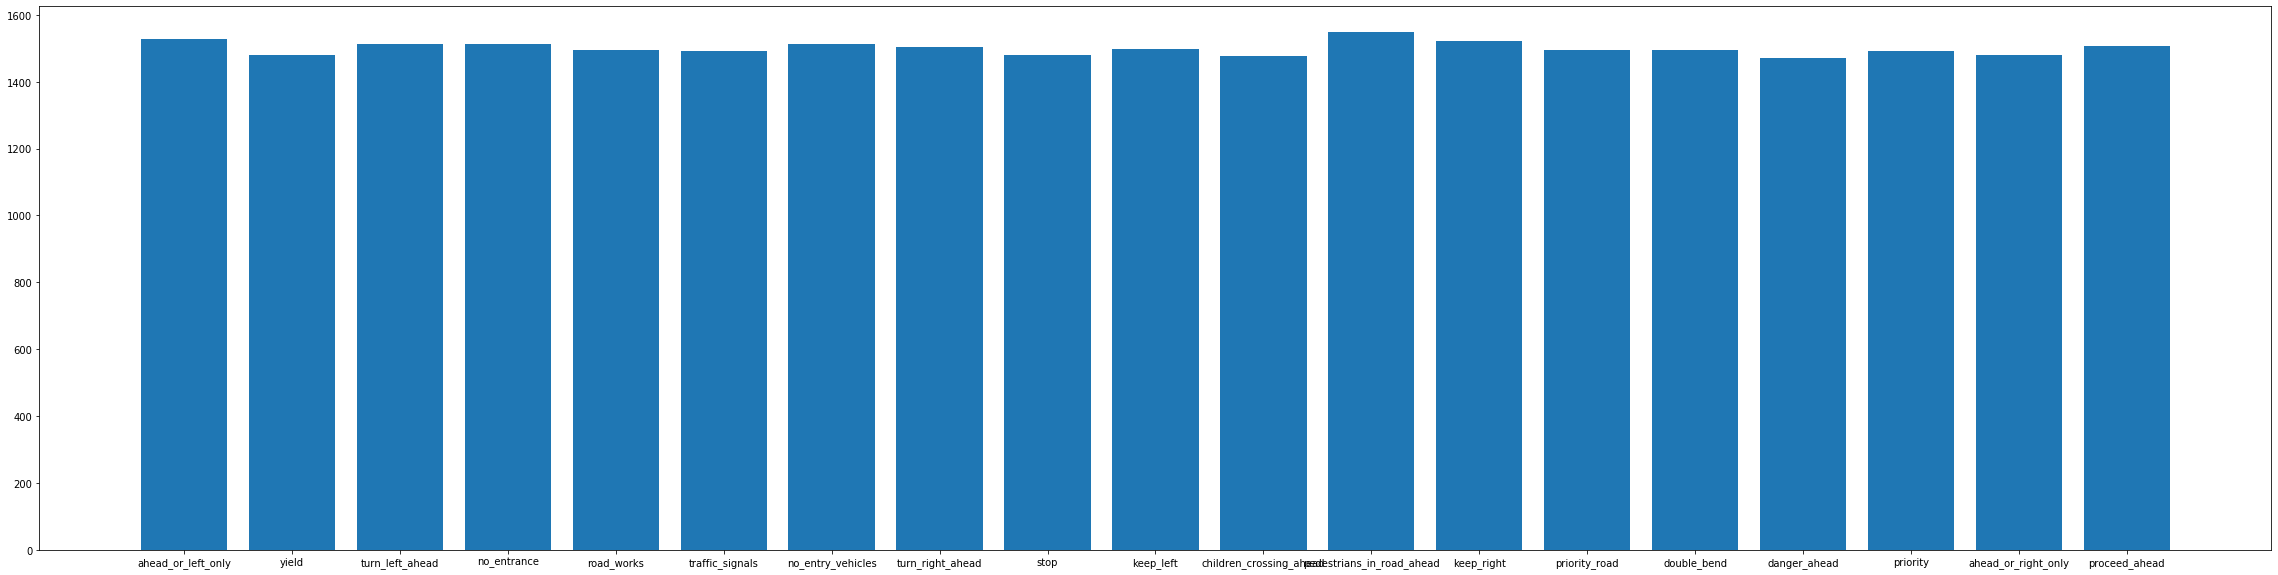

In [15]:
plt.figure(figsize=(40,10))
plt.bar(signs, [len(y_train[y_train == i]) for i in range(0, len(signs))])

## Extracting image features and learning using a support vector machine

Our first approach to classifiying the traffic sign images, is using a support vector machine [0] classifier. In order to do that, we first compute a feature vector for each image by computing Histogram of Oriented Gradients (HOG) [1] features for each image.

[0] James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani, eds. An Introduction to Statistical Learning: With Applications in R. Springer Texts in Statistics 103. New York: Springer, 2013.

[1] https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients

In [0]:
import skimage.feature

X_train_hog = np.array([skimage.feature.hog(img) for img in X_train])
X_test_hog = np.array([skimage.feature.hog(img) for img in X_test])

After the conversion the training set now consists of *n* feature vectors, each with a size of 5184 predictors:

In [17]:
X_train_hog.shape

(28500, 5184)

We now have converted from the original high-dimensional space of dimension `19200 (= 80 * 80 * 3)` to a 5184-dimensional space, which is much more anemable to analysis by a statistical learning algorithm.

We can now use the `SGDClassifier` provided by scikit-learn, which implements a support vector machine trained using stochastic gradient descent (SGD).

In [0]:
from sklearn import linear_model

clf = linear_model.SGDClassifier(max_iter=100, tol=1e-3, n_jobs=-1)

We can now fit the classifier to the training set of HOG feature vectors.

In [19]:
clf.fit(X_train_hog, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

We can now compute the training and test accuracy of our model:

In [20]:
print(f"Training accuracy: {clf.score(X_train_hog, y_train)}")
print(f"Test accuracy: {clf.score(X_test_hog, y_test)}")

Training accuracy: 0.9847368421052631
Test accuracy: 0.9468421052631579


## Deep Learning

In [21]:
import tensorflow
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
tensorflow.enable_eager_execution()

In [0]:
model = models.Sequential()

model.add(layers.Reshape((80, 80, 3), input_shape=(80 * 80 * 3,)))
model.add(layers.Conv2D(32, (3, 3), input_shape=(80, 80, 3)))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(19, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 80, 80, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 78, 78, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
              metrics=['acc'])

In [25]:
X_train_reshaped = (X_train.astype('float32') / 255.0).reshape(-1, 80 * 80 * 3)

model.fit(X_train_reshaped, to_categorical(y_train), validation_split=0.1, epochs=30)

Train on 25650 samples, validate on 2850 samples
Epoch 1/30
25650/25650 [==============================] - 15s 592us/sample - loss: 0.5533 - acc: 0.8489 - val_loss: 0.3511 - val_acc: 0.9161
Epoch 2/30
25650/25650 [==============================] - 7s 255us/sample - loss: 0.1156 - acc: 0.9687 - val_loss: 0.1774 - val_acc: 0.9526
Epoch 3/30
25650/25650 [==============================] - 7s 255us/sample - loss: 0.0623 - acc: 0.9853 - val_loss: 0.1799 - val_acc: 0.9705
Epoch 4/30
25650/25650 [==============================] - 7s 254us/sample - loss: 0.0502 - acc: 0.9903 - val_loss: 0.2841 - val_acc: 0.9632
Epoch 5/30
25650/25650 [==============================] - 6s 253us/sample - loss: 0.0480 - acc: 0.9917 - val_loss: 0.2051 - val_acc: 0.9747
Epoch 6/30
25650/25650 [==============================] - 7s 255us/sample - loss: 0.0462 - acc: 0.9943 - val_loss: 0.2786 - val_acc: 0.9719
Epoch 7/30
25650/25650 [==============================] - 7s 254us/sample - loss: 0.0445 - acc: 0.9947 - val_l

In [26]:
model.evaluate((X_test.astype('float32') / 255.0).reshape(-1, 80 * 80 * 3), to_categorical(y_test))

9500/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.829106481354117, 0.9752632]

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, [np.argmax(p) for p in model.predict((X_test.astype('float32') / 255.0).reshape(-1, 80 * 80 * 3))])

print(np.array_str(cm, max_line_width=100))

[[462   0   3   0   0   0   0   2   0   1   0   0   2   0   0   0   0   0   3]
 [  0 520   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0 483   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   1]
 [  0   0   0 484   0   0   0   0   0   0   0   1   0   0   0   0   1   0   1]
 [  0   0   0   1 473   0   0   1   0   1   4   8   1   0   3   5   7   0   0]
 [  1   1   0   0   3 480   0   2   0   0   0   5   0   0   0   9   6   1   0]
 [  0   0   0   2   2   1 473   0   2   0   0   0   1   2   1   0   4   0   0]
 [  0   0   1   1   0   0   0 481   0   0   0   0   0   1   2   0   0   2   7]
 [  0   0   1   0   0   1   0   0 518   0   1   0   0   0   0   0   0   0   0]
 [  1   2   0   0   0   0   0   0   0 498   0   0   0   0   0   0   0   1   0]
 [  0   2   0   0   0   2   0   0   0   0 505   6   0   0   3   2   4   0   0]
 [  0   1   0   0   2   0   0   0   0   0   1 435   0   0   2   6   5   0   0]
 [  1   0   3   2   0   0   0   0   0   0   0   0 47

## Functions for image analysis



In [0]:
# Load a image
def load_image(image_name):
  image = cv.imread(image_name)
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  img_hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)
  fig = plt.figure()
  plt.axis("off")
  plt.imshow(image)

In [82]:
!wget -c https://github.com/uol-mediaprocessing/group-projects-traffic-signs/blob/master/Pres_5/img/stop.jpg -O stop.jpg
!wget -c https://github.com/uol-mediaprocessing/group-projects-traffic-signs/blob/master/Pres_5/img/thump_up_green.jpg -O green.jpg
!wget -c https://github.com/uol-mediaprocessing/group-projects-traffic-signs/blob/master/Pres_5/img/thump_up_yellow.jpg -O yellow.jpg

--2020-01-21 08:59:36--  https://github.com/uol-mediaprocessing/group-projects-traffic-signs/blob/master/Pres_5/img/stop.jpg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘stop.jpg’

stop.jpg                [ <=>                ]  63.93K  --.-KB/s    in 0.02s   

2020-01-21 08:59:37 (2.57 MB/s) - ‘stop.jpg’ saved [65487]

--2020-01-21 08:59:38--  https://github.com/uol-mediaprocessing/group-projects-traffic-signs/blob/master/Pres_5/img/thump_up_green.jpg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘green.jpg’

green.jpg               [ <=>                ]  64.16K  --.-KB/s    in 0.02s   

2020-01-21 08:59:38 (2.59 MB/s) - ‘green.jpg’ saved [65697]

--2020-01-21

In [0]:
def check_result(sign_number, previous):
  if previous == 1 or (sign_number == 1 or sign_number == 3 or sign_number == 6 or sign_number == 8):
    return 1
  elif (sign_number == 13 or sign_number == 16):
    return 2
  else:
    return previous

In [0]:
def show_result_sign(sign_num):
  plt.figure()
  if sign_num == 1:
    imgre = cv.imread("stop.jpg")
  elif sign_num == 2:
    imgre = cv.imread("thump_up_green.jpg")
  else:
    imgre = cv.imread("thump_up_yellow.jpg")
  imgre=cv.cvtColor(imgre, cv.COLOR_BGR2RGB)
  show_images([imgre],1,["result"])

In [0]:
# Function to show all images
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        plt.axis("off")
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [0]:
def image_transformation_hsv(image_name):
  image1 = cv.imread(image_name)
  image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
  img1_hsv = cv.cvtColor(image1, cv.COLOR_RGB2HSV)

  # Define the colors.
  lower_color = np.array([100,100,100])
  upper_color = np.array([179,255,255])

  mask = cv.inRange(img1_hsv, lower_color, upper_color)

  edged = cv.Canny(mask, 10, 250)
  #applying closing function 
  kernel = cv.getStructuringElement(cv.MORPH_RECT, (7, 7))
  closed = cv.morphologyEx(edged, cv.MORPH_CLOSE, kernel)

  images = [image1, img1_hsv, mask, edged, kernel, closed]
  titles = ["image","img_hsv", "mask", "edged", "kernel", "closed"]
  # show_images(images,1,titles)
  return images

In [0]:
def image_transformation_hls(image_name):
  image2 = cv.imread(image_name)
  image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)
  img2_hls = cv.cvtColor(image2, cv.COLOR_RGB2HLS)
  maskes = []
  mask = np.zeros((img2_hls.shape[0], img2_hls.shape[1], 1), dtype = "uint8")
  # Define the colors.
  hls_range = [[np.array([172,40,50]), np.array([180,130,130])],
               [np.array([0,40,50]), np.array([5,130,130])],
               [np.array([145,90,90]), np.array([155,130,130])]]

  for hls_ran in hls_range:
    maskes.append(cv.inRange(img2_hls, hls_ran[0], hls_ran[1]))
  
  for mask_solo in maskes:
    mask = cv.bitwise_or(mask, mask_solo)

  edged = cv.Canny(mask, 10, 250)
  #applying closing function 
  kernel = cv.getStructuringElement(cv.MORPH_RECT, (7, 7))
  closed = cv.morphologyEx(edged, cv.MORPH_CLOSE, kernel)

  images = [image2, img2_hls, mask, edged, kernel, closed]
  titles = ["image","img2_hls", "mask", "edged", "kernel", "closed"]
  # show_images(images,1,titles)
  return images

In [0]:
start_w = 0
start_h = 0
end_w = 0
end_h = 0
def get_range_contours(x, y, w, h, image_h, image_w):
  mid_w = int(x + w/2)
  mid_h = int(y + h/2)
  if w < h:
    h = int((h + (h * 0.5))/2)
    w = h
  elif w > h:
    w = int((w + (w * 0.5))/2)
    h = w
  start_h = np.maximum(mid_h - h, 0)
  end_h = np.minimum(mid_h + h, image_h-1)
  start_w = np.maximum(mid_w - w, 0)
  end_w = np.minimum(mid_w + w, image_w-1)
  return start_h,end_h, start_w, end_w

In [0]:
def get_contours(image,mask):
  (cnts, _) = cv.findContours(mask.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

  idx = 0
  contour_images = []
  contour_titles = []
  bimage = image.copy()
  image_size = image.shape[0] * image.shape[1] * 0.001
  result_sign = 0
  for c in cnts:
    area = cv.contourArea(c) 
    # Shortlisting the regions based on there area. 
    if area > image_size:
      x,y,w,h = cv.boundingRect(c)
      if w>50 and h>50:
        idx+=1
        (sh,eh,sw,ew) = get_range_contours(x,y,w,h,image.shape[0],image.shape[1])
        new_img = image[sh:eh,sw:ew]
        cv.imwrite(str(idx) + '.png', new_img)
        sign_image = cv.resize(new_img, (80, 80))
        sign_image = (sign_image.astype('float32') / 255).reshape(-1, 80 * 80 * 3)
        contour_images.append(new_img)
        pred = model.predict([sign_image])
        label = signs[np.argmax(pred)]
        result_sign = check_result(np.argmax(pred), result_sign)
        contour_titles.append(label)
        # print(f"label: {label} {pred}")
  
        cv.putText(bimage, label, (x, y), cv.FONT_HERSHEY_COMPLEX, 1.5, (255, 0, 0), 2 , cv.LINE_AA)
        bimage = cv.rectangle(bimage, (sw, sh), (ew, eh), (255,0,0), 2)

  show_images(contour_images,1,contour_titles) 
  show_result_sign(result_sign)
  #plt.figure(figsize=(20,20))
  #plt.imshow(bimage)

## Transfer Learning

We are using the VGG16 model, provided by keras and trained on the ??? dataset.

In [39]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(80, 80, 3))

58892288/58889256 [==============================] - 1s 0us/step


The network has the following architecture:

In [40]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80, 80, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 80, 80, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 80, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 40, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 40, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 40, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 20, 20, 128)       0     

In [0]:
conv_base.trainable = True

for layer in conv_base.layers:
  layer.trainable = (layer.name == 'block5_conv1')

transfer_model = models.Sequential()

transfer_model.add(conv_base)

transfer_model.add(layers.Flatten())
transfer_model.add(layers.Dense(512, activation='relu'))
transfer_model.add(layers.Dense(19, activation='softmax'))

In [0]:
transfer_model.compile(loss='categorical_crossentropy', 
                       optimizer='rmsprop',
                       metrics=['acc'])

In [43]:
transfer_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_3 (Dense)              (None, 19)                9747      
Total params: 15,773,523
Trainable params: 3,418,643
Non-trainable params: 12,354,880
_________________________________________________________________


In [44]:
X_train_reshaped = (X_train.astype('float32') / 255.0)

transfer_model.fit(X_train_reshaped, to_categorical(y_train), epochs=10)

Train on 28500 samples
Epoch 1/10
28500/28500 [==============================] - 19s 661us/sample - loss: 0.3945 - acc: 0.8720
Epoch 2/10
28500/28500 [==============================] - 17s 612us/sample - loss: 0.0924 - acc: 0.9752
Epoch 3/10
28500/28500 [==============================] - 17s 611us/sample - loss: 0.0687 - acc: 0.9829
Epoch 4/10
28500/28500 [==============================] - 17s 611us/sample - loss: 0.0693 - acc: 0.9876
Epoch 5/10
28500/28500 [==============================] - 17s 611us/sample - loss: 0.0614 - acc: 0.9887
Epoch 6/10
28500/28500 [==============================] - 17s 612us/sample - loss: 0.0473 - acc: 0.9916
Epoch 7/10
28500/28500 [==============================] - 17s 611us/sample - loss: 0.0436 - acc: 0.9920
Epoch 8/10
28500/28500 [==============================] - 18s 616us/sample - loss: 0.0440 - acc: 0.9935
Epoch 9/10
28500/28500 [==============================] - 17s 610us/sample - loss: 0.0332 - acc: 0.9944
Epoch 10/10
28500/28500 [================

## Running on mobile devices

In [45]:
import tensorflow
transfer_model.save("model.savedmodel", save_format=tensorflow.keras.experimental.export_saved_model)
#converter = tensorflow.lite.TFLiteConverter.from_keras_model_file("model.h5")
#
tflite_model = converter.convert()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model.savedmodel/assets


NameError: ignored

In [0]:
f = open("traffic_sign_model.tflite", "w+b")
f.write(tflite_model)
f.close()

In [0]:
interpreter = tensorflow.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the TensorFlow Lite model on random input data.
interpreter.set_tensor(input_details[0]['index'], [X_train[1300].astype('float32') / 255.0])

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
interpreter.get_tensor(output_details[0]['index'])

## Object detection

We implement object detection using a convolutional neural network based on the SSD [0] architecture. Specifically, we implement the SSD300 version (i.e. the input images have a size of 300x300 pixels) and we use the VGG16 network architecture for the image classification part of the SSD model.

[0] W. Liu et al., SSD: Single Shot MultiBox Detector, 2016, https://arxiv.org/pdf/1512.02325.pdf

In [0]:
import numpy as np

import tensorflow.keras.backend as K
from tensorflow.keras.layers import InputSpec, Layer

class AnchorBoxes(Layer):
    '''
    A Keras layer to create an output tensor containing anchor box coordinates
    and variances based on the input tensor and the passed arguments.

    A set of 2D anchor boxes of different aspect ratios is created for each spatial unit of
    the input tensor. The number of anchor boxes created per unit depends on the arguments
    `aspect_ratios` and `two_boxes_for_ar1`, in the default case it is 4. The boxes
    are parameterized by the coordinate tuple `(xmin, xmax, ymin, ymax)`.

    The logic implemented by this layer is identical to the logic in the module
    `ssd_box_encode_decode_utils.py`.

    The purpose of having this layer in the network is to make the model self-sufficient
    at inference time. Since the model is predicting offsets to the anchor boxes
    (rather than predicting absolute box coordinates directly), one needs to know the anchor
    box coordinates in order to construct the final prediction boxes from the predicted offsets.
    If the model's output tensor did not contain the anchor box coordinates, the necessary
    information to convert the predicted offsets back to absolute coordinates would be missing
    in the model output. The reason why it is necessary to predict offsets to the anchor boxes
    rather than to predict absolute box coordinates directly is explained in `README.md`.

    Input shape:
        4D tensor of shape `(batch, channels, height, width)` if `dim_ordering = 'th'`
        or `(batch, height, width, channels)` if `dim_ordering = 'tf'`.

    Output shape:
        5D tensor of shape `(batch, height, width, n_boxes, 8)`. The last axis contains
        the four anchor box coordinates and the four variance values for each box.
    '''

    def __init__(self,
                 img_height,
                 img_width,
                 this_scale,
                 next_scale,
                 aspect_ratios=[0.5, 1.0, 2.0],
                 this_steps=None,
                 this_offsets=None,
                 variances=[0.1, 0.1, 0.2, 0.2],
                 **kwargs):
      
        variances = np.array(variances)
        
        self.img_height = img_height
        self.img_width = img_width
        self.this_scale = this_scale
        self.next_scale = next_scale
        self.aspect_ratios = aspect_ratios
        self.this_steps = this_steps
        self.this_offsets = this_offsets
        self.variances = variances
        self.n_boxes = len(aspect_ratios) + 1
        
        super(AnchorBoxes, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_spec = [InputSpec(shape=input_shape)]
        super(AnchorBoxes, self).build(input_shape)

    def call(self, x, mask=None):
        # Compute box width and height for each aspect ratio
        # The shorter side of the image will be used to compute `w` and `h` using `scale` and `aspect_ratios`.
        size = min(self.img_height, self.img_width)
        # Compute the box widths and and heights for all aspect ratios
        wh_list = []
        for ar in self.aspect_ratios:
            if (ar == 1):
                # Compute the regular anchor box for aspect ratio 1.
                box_height = box_width = self.this_scale * size
                wh_list.append((box_width, box_height))
                
                # Compute one slightly larger version using the geometric mean of this scale value and the next.
                box_height = box_width = np.sqrt(self.this_scale * self.next_scale) * size
                wh_list.append((box_width, box_height))
            else:
                box_height = self.this_scale * size / np.sqrt(ar)
                box_width = self.this_scale * size * np.sqrt(ar)
                wh_list.append((box_width, box_height))
        wh_list = np.array(wh_list)

        # We need the shape of the input tensor
        batch_size, feature_map_height, feature_map_width, feature_map_channels = x.shape

        batch_size = batch_size.value
        feature_map_height = feature_map_height.value
        feature_map_width = feature_map_width.value
        feature_map_channels = feature_map_channels.value
        
        # Compute the grid of box center points. They are identical for all aspect ratios.

        # Compute the step sizes, i.e. how far apart the anchor box center points will be vertically and horizontally.
        if (self.this_steps is None):
            step_height = self.img_height / feature_map_height
            step_width = self.img_width / feature_map_width
        else:
            if isinstance(self.this_steps, (list, tuple)) and (len(self.this_steps) == 2):
                step_height = self.this_steps[0]
                step_width = self.this_steps[1]
            elif isinstance(self.this_steps, (int, float)):
                step_height = self.this_steps
                step_width = self.this_steps
        # Compute the offsets, i.e. at what pixel values the first anchor box center point will be from the top and from the left of the image.
        if (self.this_offsets is None):
            offset_height = 0.5
            offset_width = 0.5
        else:
            if isinstance(self.this_offsets, (list, tuple)) and (len(self.this_offsets) == 2):
                offset_height = self.this_offsets[0]
                offset_width = self.this_offsets[1]
            elif isinstance(self.this_offsets, (int, float)):
                offset_height = self.this_offsets
                offset_width = self.this_offsets
        # Now that we have the offsets and step sizes, compute the grid of anchor box center points.
        cy = np.linspace(offset_height * step_height, (offset_height + feature_map_height - 1) * step_height, feature_map_height)
        cx = np.linspace(offset_width * step_width, (offset_width + feature_map_width - 1) * step_width, feature_map_width)
        cx_grid, cy_grid = np.meshgrid(cx, cy)
        cx_grid = np.expand_dims(cx_grid, -1) # This is necessary for np.tile() to do what we want further down
        cy_grid = np.expand_dims(cy_grid, -1) # This is necessary for np.tile() to do what we want further down

        # Create a 4D tensor template of shape `(feature_map_height, feature_map_width, n_boxes, 4)`
        # where the last dimension will contain `(cx, cy, w, h)`
        boxes_tensor = np.zeros((feature_map_height, feature_map_width, self.n_boxes, 4))

        boxes_tensor[:, :, :, 0] = np.tile(cx_grid, (1, 1, self.n_boxes)) # Set cx
        boxes_tensor[:, :, :, 1] = np.tile(cy_grid, (1, 1, self.n_boxes)) # Set cy
        boxes_tensor[:, :, :, 2] = wh_list[:, 0] # Set w
        boxes_tensor[:, :, :, 3] = wh_list[:, 1] # Set h

        # Create a tensor to contain the variances and append it to `boxes_tensor`. This tensor has the same shape
        # as `boxes_tensor` and simply contains the same 4 variance values for every position in the last axis.
        variances_tensor = np.zeros_like(boxes_tensor) # Has shape `(feature_map_height, feature_map_width, n_boxes, 4)`
        variances_tensor += self.variances # Long live broadcasting
        # Now `boxes_tensor` becomes a tensor of shape `(feature_map_height, feature_map_width, n_boxes, 8)`
        boxes_tensor = np.concatenate((boxes_tensor, variances_tensor), axis=-1)

        # Now prepend one dimension to `boxes_tensor` to account for the batch size and tile it along
        # The result will be a 5D tensor of shape `(batch_size, feature_map_height, feature_map_width, n_boxes, 8)`
        boxes_tensor = np.expand_dims(boxes_tensor, axis=0)
        boxes_tensor = K.tile(K.constant(boxes_tensor, dtype='float32'), (K.shape(x)[0], 1, 1, 1, 1))

        return boxes_tensor

    def compute_output_shape(self, input_shape):
        batch_size, feature_map_height, feature_map_width, feature_map_channels = input_shape
        
        return (batch_size, feature_map_height, feature_map_width, self.n_boxes, 8)

    def get_config(self):
        config = {
            'img_height': self.img_height,
            'img_width': self.img_width,
            'this_scale': self.this_scale,
            'next_scale': self.next_scale,
            'aspect_ratios': list(self.aspect_ratios),
            'variances': list(self.variances)
        }
        base_config = super(AnchorBoxes, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [0]:
from tensorflow.keras import layers, initializers, Model

class SSDModel:

  num_classes = 0

  def __init__(self, num_classes, img_height, img_width):
    self.num_classes = num_classes

    # Aspect ratios per layer (the numbers are taken from the SSD paper)
    aspect_ratios_per_layer = [[1.0, 2.0, 0.5],
                               [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                               [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                               [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                               [1.0, 2.0, 0.5],
                               [1.0, 2.0, 0.5]]

    # The anchor box scaling factors used in the original SSD300 for the Pascal VOC datasets
    scales = [0.1, 0.2, 0.37, 0.54, 0.71, 0.88, 1.05]

    # The space between two adjacent anchor box center points for each predictor layer.
    steps = [8, 16, 32, 64, 100, 300]

    # The offsets of the first anchor box center points from the top and left borders
    offsets = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

    # The number of anchor boxes per cell for each predictor layer.
    num_of_boxes = [len(ar) + 1 for ar in aspect_ratios_per_layer]
    
    inp = layers.Input(shape=(img_height, img_width, 3))

    feature_extractor, conv4_3 = self.__get_feature_extractor(inp)

    # SSD extra feature layers begin here

    conv6 = layers.Conv2D(1024, (3, 3), dilation_rate=(6, 6), padding='same')(feature_extractor)

    conv7 = layers.Conv2D(1024, (1, 1), padding='same')(conv6)

    conv8_1 = layers.Conv2D(256, (1, 1), padding='same')(conv7)
    conv8_1 = layers.ZeroPadding2D(padding=((1, 1), (1, 1)), name='conv8_padding')(conv8_1)

    conv8_2 = layers.Conv2D(512, (3, 3), strides=(2, 2), padding='valid')(conv8_1)

    conv9_1 = layers.Conv2D(128, (1, 1), padding='same')(conv8_2)
    conv9_1 = layers.ZeroPadding2D(padding=((1, 1), (1, 1)), name='conv9_padding')(conv9_1)

    conv9_2 = layers.Conv2D(256, (3, 3), strides=(2, 2), padding='valid')(conv9_1)

    conv10_1 = layers.Conv2D(128, (1, 1), padding='same')(conv9_2)
    conv10_2 = layers.Conv2D(256, (3, 3), strides=(1, 1), padding='valid')(conv10_1)

    conv11_1 = layers.Conv2D(128, (1, 1), padding='same')(conv10_2)
    conv11_2 = layers.Conv2D(256, (3, 3), strides=(1, 1), padding='valid')(conv11_1)

    # Feed conv4_3 into a normalization layer since the gradient can get
    # very large.
    conv4_3_norm = layers.LayerNormalization(gamma_initializer=initializers.Constant(20), name='conv4_3_norm')(conv4_3)

    # These are the convolutional class predictors, i.e. each of these layers has an
    # output shape of (batch, height, width, num_of_boxes * num_classes), which 
    # means that it outputs a prediction (vector of length num_classes) for each 
    # box for each position in the feature map.
    conv4_3_norm_pred = layers.Conv2D(num_of_boxes[0] * num_classes, (3, 3), padding='same', name='conv4_3_norm_pred')(conv4_3_norm)
    conv7_pred = layers.Conv2D(num_of_boxes[1] * num_classes, (3, 3), padding='same', name='conv7_pred')(conv7)
    conv8_2_pred = layers.Conv2D(num_of_boxes[2] * num_classes, (3, 3), padding='same', name='conv8_2_pred')(conv8_2)
    conv9_2_pred = layers.Conv2D(num_of_boxes[3] * num_classes, (3, 3), padding='same', name='conv9_2_pred')(conv9_2)
    conv10_2_pred = layers.Conv2D(num_of_boxes[4] * num_classes, (3, 3), padding='same', name='conv10_2_pred')(conv10_2)
    conv11_2_pred = layers.Conv2D(num_of_boxes[5] * num_classes, (3, 3), padding='same', name='conv11_2_pred')(conv11_2)

    # These are the convolutional bounding box predictors, i.e. each of these 
    # layers has an output shape of (batch, height, width, num_of_boxes * 4), which 
    # means that it outputs a predicted bounding box (xmin, ymin, xmax, ymax)
    # for each anchor box.
    conv4_3_norm_bbox = layers.Conv2D(num_of_boxes[0] * 4, (3, 3), padding='same', name='conv4_3_norm_bbox')(conv4_3_norm)
    conv7_bbox = layers.Conv2D(num_of_boxes[1] * 4, (3, 3), padding='same', name='conv7_bbox')(conv7)
    conv8_2_bbox = layers.Conv2D(num_of_boxes[2] * 4, (3, 3), padding='same', name='conv8_2_bbox')(conv8_2)
    conv9_2_bbox = layers.Conv2D(num_of_boxes[3] * 4, (3, 3), padding='same', name='conv9_2_bbox')(conv9_2)
    conv10_2_bbox = layers.Conv2D(num_of_boxes[4] * 4, (3, 3), padding='same', name='conv10_2_bbox')(conv10_2)
    conv11_2_bbox = layers.Conv2D(num_of_boxes[5] * 4, (3, 3), padding='same', name='conv11_2_bbox')(conv11_2)

    # Output shape of anchors: `(batch, height, width, n_boxes, 8)`
    conv4_3_norm_anchor = AnchorBoxes(img_height, img_width, this_scale=scales[0], next_scale=scales[1], aspect_ratios=aspect_ratios_per_layer[0],
                                             this_steps=steps[0], this_offsets=offsets[0], name='conv4_3_norm_anchor')(conv4_3_norm_bbox)

    conv7_anchor = AnchorBoxes(img_height, img_width, this_scale=scales[1], next_scale=scales[2], aspect_ratios=aspect_ratios_per_layer[1],
                                    this_steps=steps[1], this_offsets=offsets[1], name='conv7_anchor')(conv7_bbox)

    conv8_2_anchor = AnchorBoxes(img_height, img_width, this_scale=scales[2], next_scale=scales[3], aspect_ratios=aspect_ratios_per_layer[2],
                                        this_steps=steps[2], this_offsets=offsets[2], name='conv8_2_anchor')(conv8_2_bbox)

    conv9_2_anchor = AnchorBoxes(img_height, img_width, this_scale=scales[3], next_scale=scales[4], aspect_ratios=aspect_ratios_per_layer[3],
                                        this_steps=steps[3], this_offsets=offsets[3], name='conv9_2_anchor')(conv9_2_bbox)

    conv10_2_anchor = AnchorBoxes(img_height, img_width, this_scale=scales[4], next_scale=scales[5], aspect_ratios=aspect_ratios_per_layer[4],
                                        this_steps=steps[4], this_offsets=offsets[4], name='conv10_2_anchor')(conv10_2_bbox)

    conv11_2_anchor = AnchorBoxes(img_height, img_width, this_scale=scales[5], next_scale=scales[6], aspect_ratios=aspect_ratios_per_layer[5],
                                        this_steps=steps[5], name='conv11_2_anchor')(conv11_2_bbox)

    ### Reshape

    # Reshape the class predictions, yielding 3D tensors of shape `(batch, height * width * n_boxes, n_classes)`
    # We want the classes isolated in the last axis to perform softmax on them
    conv4_3_norm_pred_reshape = layers.Reshape((-1, num_classes), name='conv4_3_norm_pred_reshape')(conv4_3_norm_pred)
    conv7_pred_reshape = layers.Reshape((-1, num_classes), name='conv7_pred_reshape')(conv7_pred)
    conv8_2_pred_reshape = layers.Reshape((-1, num_classes), name='conv8_2_pred_reshape')(conv8_2_pred)
    conv9_2_pred_reshape = layers.Reshape((-1, num_classes), name='conv9_2_pred_reshape')(conv9_2_pred)
    conv10_2_pred_reshape = layers.Reshape((-1, num_classes), name='conv10_2_pred_reshape')(conv10_2_pred)
    conv11_2_pred_reshape = layers.Reshape((-1, num_classes), name='conv11_2_pred_reshape')(conv11_2_pred)

    # Reshape the box predictions, yielding 3D tensors of shape `(batch, height * width * n_boxes, 4)`
    # We want the four box coordinates isolated in the last axis to compute the smooth L1 loss
    conv4_3_norm_bbox_reshape = layers.Reshape((-1, 4), name='conv4_3_norm_bbox_reshape')(conv4_3_norm_bbox)
    conv7_bbox_reshape = layers.Reshape((-1, 4), name='conv7_bbox_reshape')(conv7_bbox)
    conv8_2_bbox_reshape = layers.Reshape((-1, 4), name='conv8_2_bbox_reshape')(conv8_2_bbox)
    conv9_2_bbox_reshape = layers.Reshape((-1, 4), name='conv9_2_bbox_reshape')(conv9_2_bbox)
    conv10_2_bbox_reshape = layers.Reshape((-1, 4), name='conv10_2_bbox_reshape')(conv10_2_bbox)
    conv11_2_bbox_reshape = layers.Reshape((-1, 4), name='conv11_2_bbox_reshape')(conv11_2_bbox)

    # Reshape the anchor box tensors, yielding 3D tensors of shape `(batch, height * width * n_boxes, 8)`
    conv4_3_norm_anchor_reshape = layers.Reshape((-1, 8), name='conv4_3_norm_anchor_reshape')(conv4_3_norm_anchor)
    conv7_anchor_reshape = layers.Reshape((-1, 8), name='fc7_anchor_reshape')(conv7_anchor)
    conv8_2_anchor_reshape = layers.Reshape((-1, 8), name='conv6_2_anchor_reshape')(conv8_2_anchor)
    conv9_2_anchor_reshape = layers.Reshape((-1, 8), name='conv7_2_anchor_reshape')(conv9_2_anchor)
    conv10_2_anchor_reshape = layers.Reshape((-1, 8), name='conv8_2_anchor_reshape')(conv10_2_anchor)
    conv11_2_anchor_reshape = layers.Reshape((-1, 8), name='conv9_2_anchor_reshape')(conv11_2_anchor)

    ### Concatenate the predictions from the different layers

    # Axis 0 (batch) and axis 2 (n_classes or 4, respectively) are identical for all layer predictions,
    # so we want to concatenate along axis 1, the number of boxes per layer
    # Output shape of `mbox_conf`: (batch, n_boxes_total, n_classes)
    mbox_conf = layers.Concatenate(axis=1, name='mbox_conf')([conv4_3_norm_pred_reshape,
                                                       conv7_pred_reshape,
                                                       conv8_2_pred_reshape,
                                                       conv9_2_pred_reshape,
                                                       conv10_2_pred_reshape,
                                                       conv11_2_pred_reshape])

    # Output shape of `mbox_loc`: (batch, n_boxes_total, 4)
    mbox_loc = layers.Concatenate(axis=1, name='mbox_loc')([conv4_3_norm_bbox_reshape,
                                                     conv7_bbox_reshape,
                                                     conv8_2_bbox_reshape,
                                                     conv9_2_bbox_reshape,
                                                     conv10_2_bbox_reshape,
                                                     conv11_2_bbox_reshape])

    # Output shape of `mbox_priorbox`: (batch, n_boxes_total, 8)
    mbox_priorbox = layers.Concatenate(axis=1, name='mbox_priorbox')([conv4_3_norm_anchor_reshape,
                                                               conv7_anchor_reshape,
                                                               conv8_2_anchor_reshape,
                                                               conv9_2_anchor_reshape,
                                                               conv10_2_anchor_reshape,
                                                               conv11_2_anchor_reshape])

    # The box coordinate predictions will go into the loss function just the way they are,
    # but for the class predictions, we'll apply a softmax activation layer first
    mbox_conf_softmax = layers.Activation('softmax', name='mbox_conf_softmax')(mbox_conf)

    # Concatenate the class and box predictions and the anchors to one large predictions vector
    # Output shape of `predictions`: (batch, n_boxes_total, n_classes + 4 + 8)
    predictions = layers.Concatenate(axis=2, name='predictions')([mbox_conf_softmax, mbox_loc, mbox_priorbox])

    self.model = Model(inputs=inp, outputs=predictions)

  """
  Constructs the feature extractor part of the SSD network. Default is VGG16.
  """
  def __get_feature_extractor(self, input_layer):
    # Block 1
    x = layers.Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block1_conv1')(input_layer)
    x = layers.Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block1_conv2')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block1_pool')(x)

    # Block 2
    x = layers.Conv2D(128, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block2_conv1')(x)
    x = layers.Conv2D(128, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block2_conv2')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block2_pool')(x)

    # Block 3
    x = layers.Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv1')(x)
    x = layers.Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv2')(x)
    x = layers.Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv3')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block3_pool')(x)

    # Block 4
    x = layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv1')(x)
    x = layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv2')(x)
    x = layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv3')(x)
    conv4_3 = x
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block4_pool')(x)

    # Block 5
    x = layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv1')(x)
    x = layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv2')(x)
    x = layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv3')(x)
    x = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same', name='block5_pool')(x)

    return x, conv4_3


ssd = SSDModel(19, 300, 300)

In [0]:
ssd.model.summary()

In [0]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(ssd.model).create(prog='dot', format='svg'))

## Import and analyse a Picture

In [46]:
from google.colab import files
uploaded = files.upload()

Saving IMG_20191021_205322.jpg to IMG_20191021_205322.jpg
Saving IMG_20191021_170111.jpg to IMG_20191021_170111.jpg
Saving IMG_20191021_165927.jpg to IMG_20191021_165927.jpg
Saving SelBild_2.jpg to SelBild_2.jpg
Saving SelBild_1.jpg to SelBild_1.jpg


In [0]:
for fn in uploaded.keys():
  load_image(fn)
  image_return = image_transformation_hsv(fn)
  get_contours(image_return[0], image_return[2])

IMG_20191021_205322.jpg


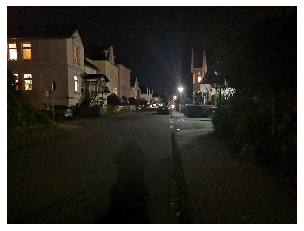

<Figure size 0x0 with 0 Axes>

<Figure size 432x288 with 0 Axes>

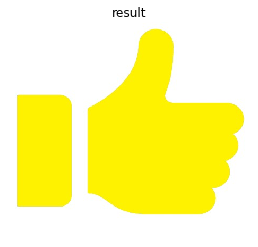

IMG_20191021_170111.jpg


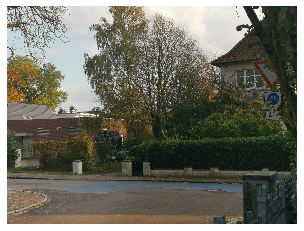

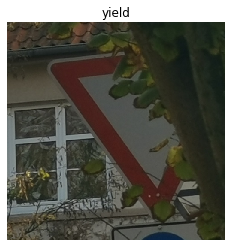

<Figure size 432x288 with 0 Axes>

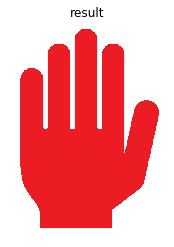

IMG_20191021_165927.jpg


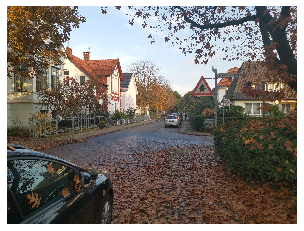

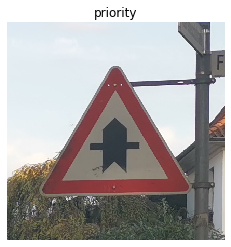

<Figure size 432x288 with 0 Axes>

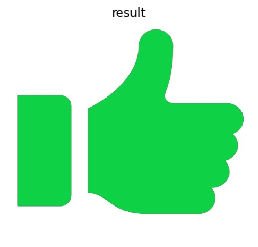

SelBild_2.jpg


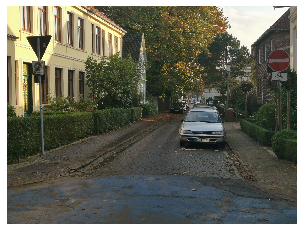

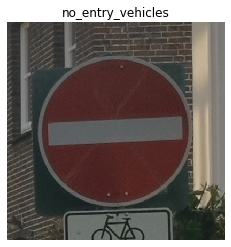

<Figure size 432x288 with 0 Axes>

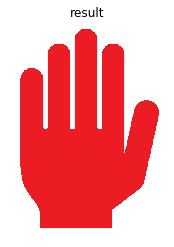

SelBild_1.jpg


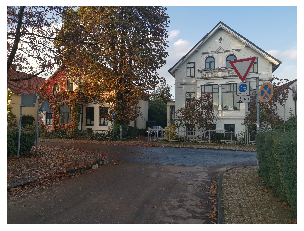

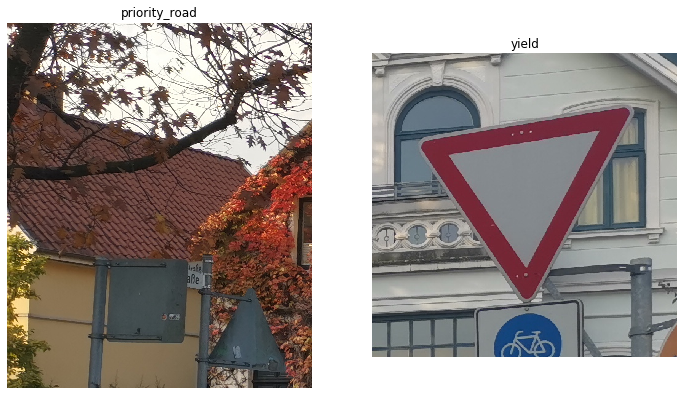

<Figure size 432x288 with 0 Axes>

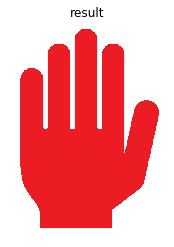

In [90]:
for fn in uploaded.keys():
  load_image(fn)
  image_return = image_transformation_hls(fn)
  get_contours(image_return[0], image_return[2])